# Pré-Processamento

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Dataset: https://www.kaggle.com/datasets/uom190346a/global-coffee-health-dataset?resource=download

In [2]:
data = pd.read_csv('synthetic_coffee_health_10000.csv', sep = ',')

In [3]:
data.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [4]:
data.shape

(10000, 16)

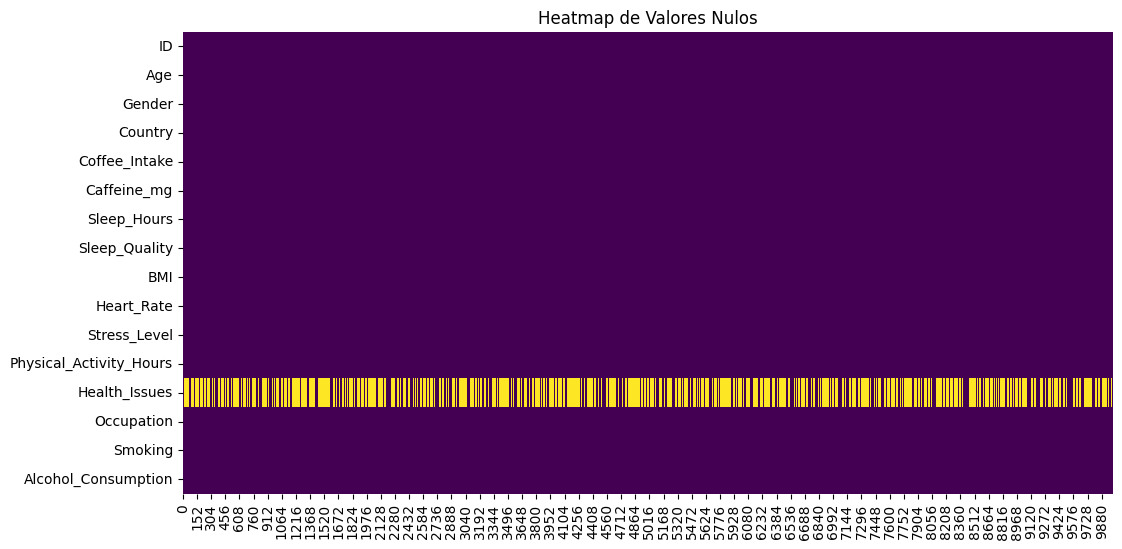

In [5]:
# plotar heatmap de valores nulos
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull().T, cbar=False, cmap='viridis')
plt.title('Heatmap de Valores Nulos')
plt.show()

In [6]:
dataWithoutHealthIssues = data.drop(columns=['Health_Issues'])
dataDroppedNA = data.dropna()
dataWithoutHealthIssues.shape, dataDroppedNA.shape

((10000, 15), (4059, 16))

Se removermos a feature "Health_Issues", a qual é a única que possui valores nulo, teríamos 10000 ocorrências para tentar prever a "Sleep_Quality".

Se mantivermos a feature "Health_Issues", e jogar fora todas as ocorrências em que ela é nula, ainda teremos 4059 ocorrências para prever "Sleep_Quality". O que não me parece ruim.

<Axes: xlabel='Sleep_Quality'>

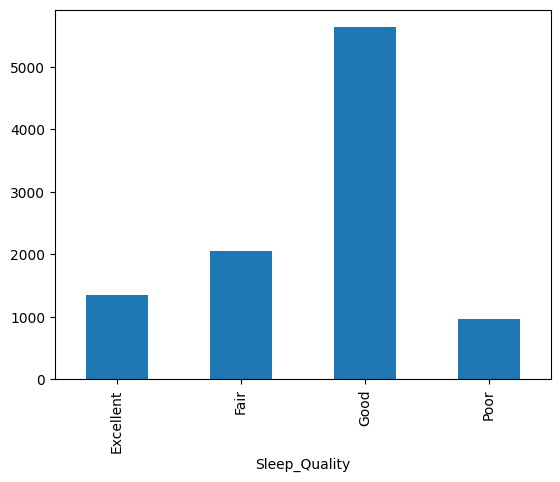

In [7]:
dataWithoutHealthIssues["Sleep_Quality"].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='Sleep_Quality'>

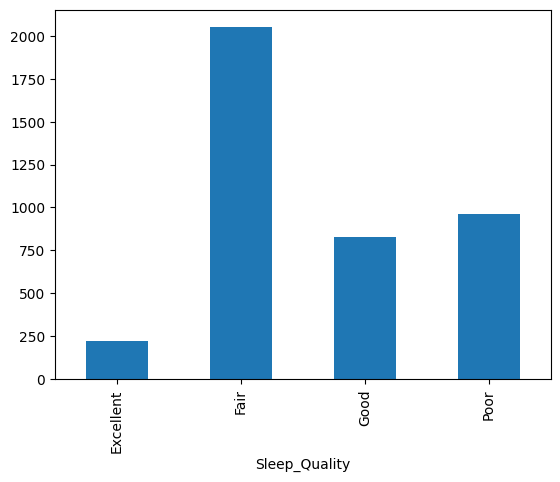

In [8]:
dataDroppedNA["Sleep_Quality"].value_counts().sort_index().plot(kind='bar')

Em ambos os casos, as classes continuam bem desbalanceadas, então não faz muita diferença qual corte escolher. Vamos trabalhar com o dataset com 10000 pra ficar redondo.

Agora, avaliando os valores das colunas:

<Axes: xlabel='Age'>

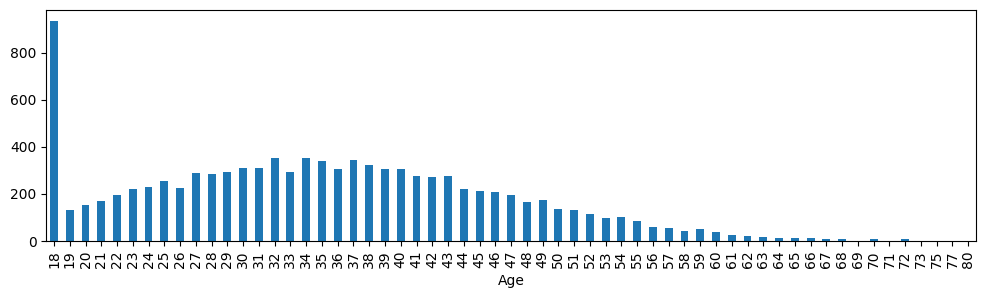

In [9]:
dataWithoutHealthIssues["Age"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Gender'>

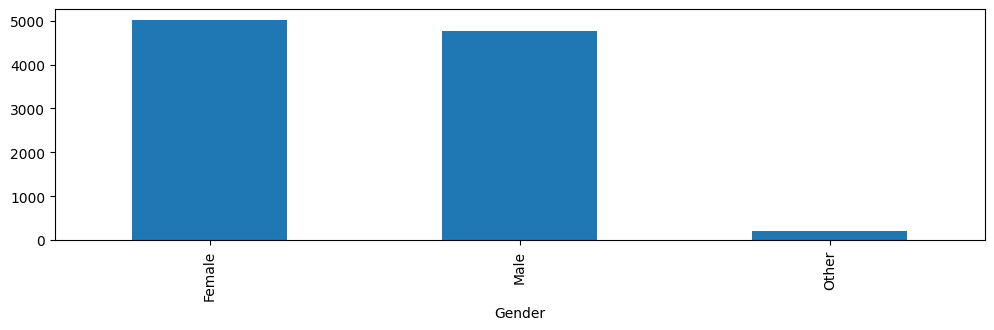

In [10]:
dataWithoutHealthIssues["Gender"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Country'>

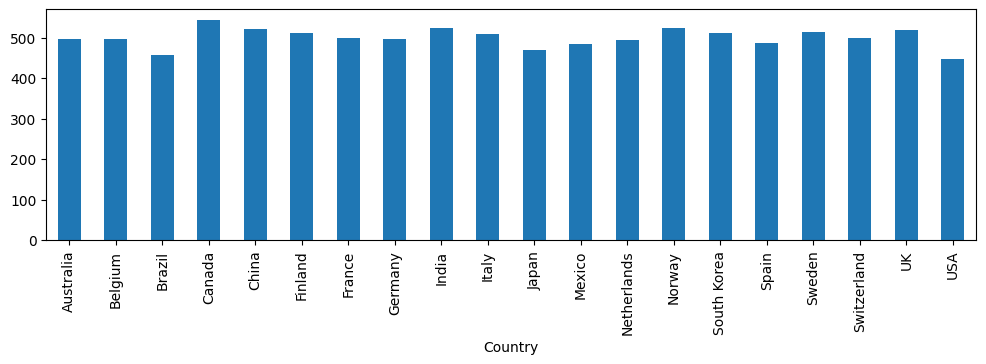

In [11]:
dataWithoutHealthIssues["Country"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Coffee_Intake'>

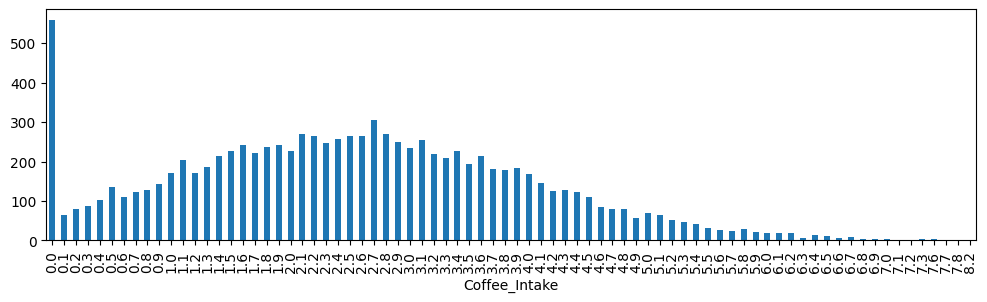

In [12]:
dataWithoutHealthIssues["Coffee_Intake"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Caffeine_mg'>

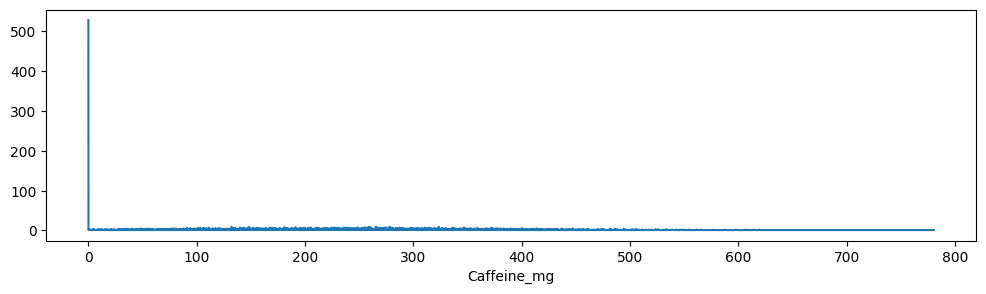

In [13]:
dataWithoutHealthIssues["Caffeine_mg"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))

<Axes: xlabel='Sleep_Hours'>

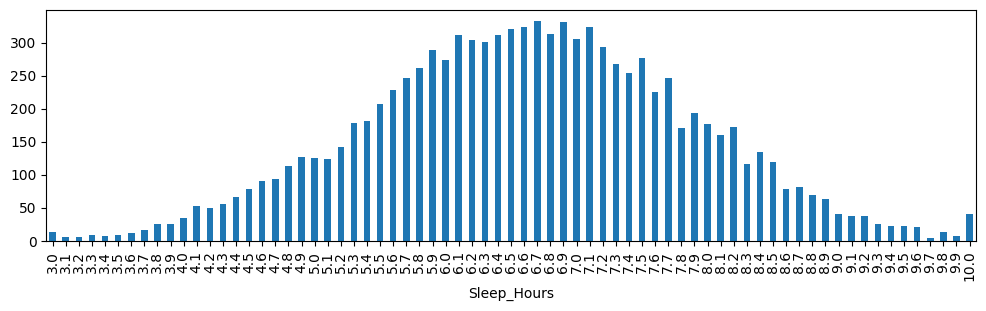

In [14]:
dataWithoutHealthIssues["Sleep_Hours"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))


<Axes: xlabel='Sleep_Quality'>

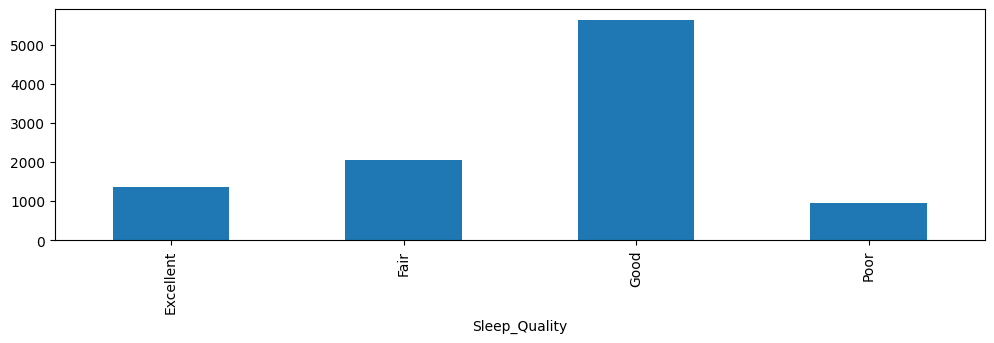

In [15]:
dataWithoutHealthIssues["Sleep_Quality"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='BMI'>

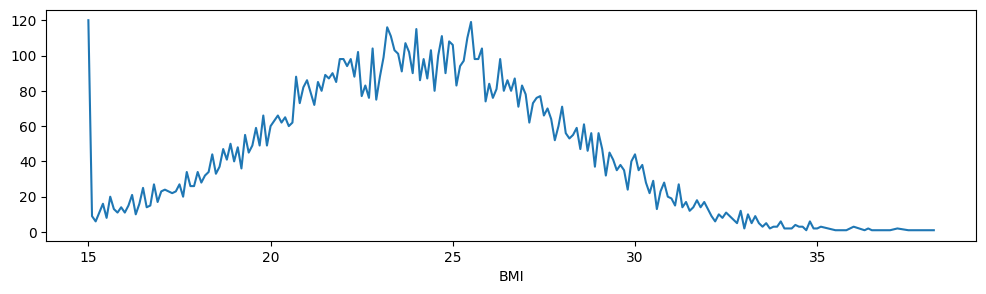

In [16]:
dataWithoutHealthIssues["BMI"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))


<Axes: xlabel='Heart_Rate'>

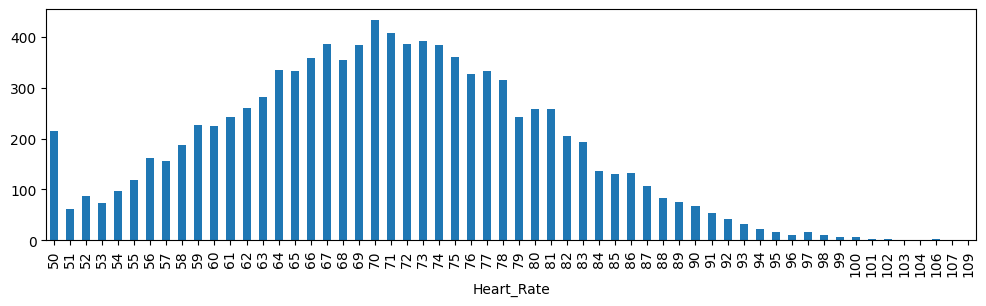

In [17]:
dataWithoutHealthIssues["Heart_Rate"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Stress_Level'>

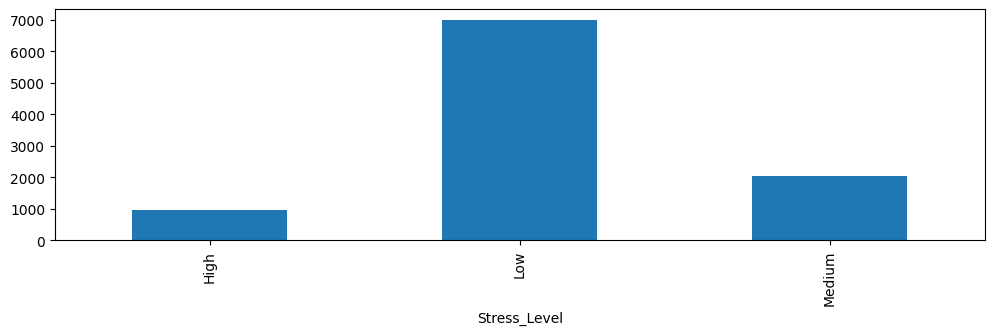

In [18]:
dataWithoutHealthIssues["Stress_Level"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Physical_Activity_Hours'>

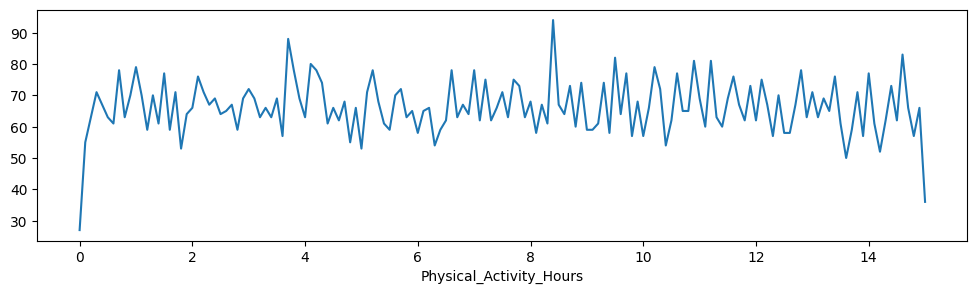

In [19]:
dataWithoutHealthIssues["Physical_Activity_Hours"].value_counts().sort_index().plot(kind='line', figsize=(12, 3))

<Axes: xlabel='Occupation'>

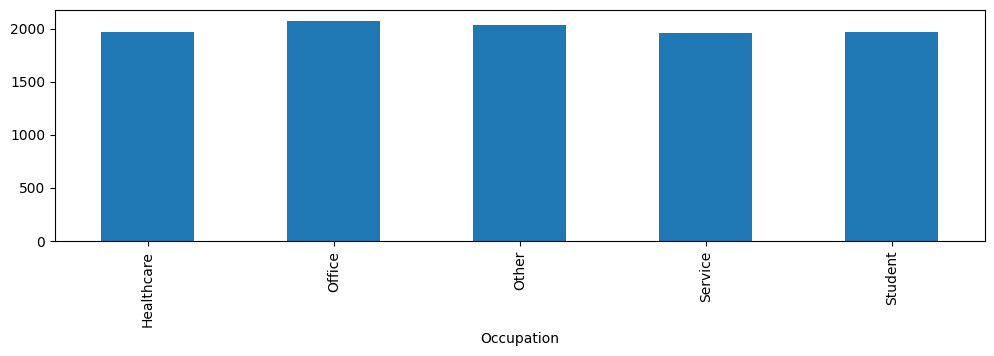

In [20]:
dataWithoutHealthIssues["Occupation"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Smoking'>

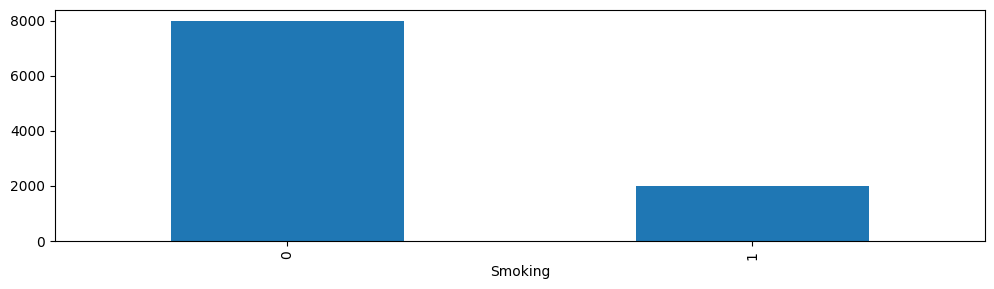

In [21]:
dataWithoutHealthIssues["Smoking"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: xlabel='Alcohol_Consumption'>

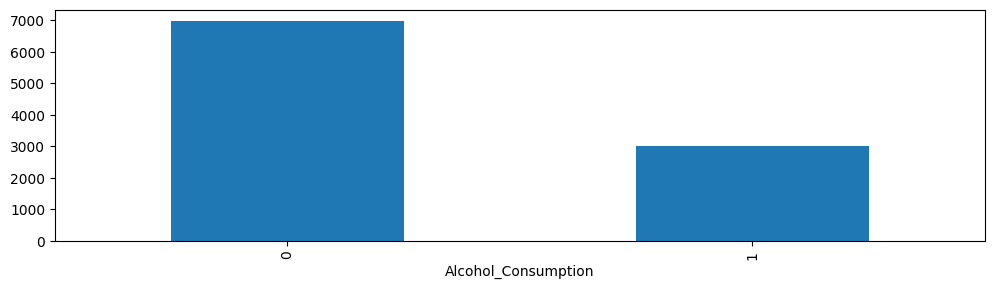

In [22]:
dataWithoutHealthIssues["Alcohol_Consumption"].value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

In [23]:
dataWithoutHealthIssues.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1


- Gender: categórica nominal com 3 valores únicos. Aplicar OneHot. 
- Country: categórica numérica com 20 valores únicos. Aplicar OneHot. (Considerar agrupar por continentes, perguntar ao professor).
- Coffee_Intake: numérica contínua. Normalizar. (Conversar com o professor se "cortar" os extremos pode ser bom para o treinamento).
- Caffeine_mg: numérica contínua. Normalizar.
- Sleep_Hours: numérica contínua. Normalizar.
- Sleep_Quality: categórica ordinal e target dos modelos. Só converter para numérica.
- BMI: numérica contínua. Normalizar.
- Heart_Rate: numérica contínua. Normalizar.
- Stress_Level: categórica nominal com 3 valores únicos. Aplicar OneHot.
- Physical_Activity_Hours: numérica contínua. Normalizar.
- Occupation: categórica nominal com 5 valores únicos: Aplicar OneHot.
- Smoking: binária.
- Alcohol_Consumption: binária.

OBS1: vou remover a coluna de país para verificar se melhora as métricas do KNN

In [24]:
dataEnconded = dataWithoutHealthIssues.copy()

#dataEnconded.drop(columns=['Country'], inplace=True)

# OneHot para variáveis categóricas nominais
dataEnconded = pd.get_dummies(dataEnconded, columns=['Gender', 'Country', 'Stress_Level', 'Occupation'], drop_first=False, dtype=int)
#dataEnconded = pd.get_dummies(dataEnconded, columns=['Gender', 'Stress_Level', 'Occupation'], drop_first=False, dtype=int)


# Normalização das variáveis contínuas
scaler = MinMaxScaler()
columnsToNormalize = ['Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'BMI', 'Heart_Rate', 'Physical_Activity_Hours']
dataEnconded[columnsToNormalize] = scaler.fit_transform(dataEnconded[columnsToNormalize])

# Conversão manual da coluna Sleep_Quality para valores numéricos
sleepQualityMap = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

dataEnconded['Sleep_Quality'] = dataEnconded['Sleep_Quality'].map(sleepQualityMap)



dataEnconded.head()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,...,Country_UK,Country_USA,Stress_Level_High,Stress_Level_Low,Stress_Level_Medium,Occupation_Healthcare,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,1,40,0.426829,0.420479,0.642857,2,0.426724,0.474576,0.966667,0,...,0,0,0,1,0,0,0,1,0,0
1,2,33,0.121951,0.120595,0.457143,2,0.215517,0.288136,0.733333,0,...,0,0,0,1,0,0,0,0,1,0
2,3,42,0.646341,0.645521,0.414286,1,0.331897,0.152542,0.746667,0,...,0,0,0,0,1,0,1,0,0,0
3,4,53,0.317073,0.319364,0.614286,2,0.418103,0.355932,0.440000,0,...,0,0,0,1,0,0,0,1,0,0
4,5,32,0.378049,0.381904,0.328571,1,0.392241,0.440678,0.566667,0,...,0,0,0,0,1,0,0,0,0,1


In [25]:
# divide o dataset em treino, validacao e teste
train, test = train_test_split(dataEnconded, test_size=0.2, stratify=dataEnconded["Sleep_Quality"])
train, validation = train_test_split(train, test_size=0.2, stratify=train["Sleep_Quality"])
train.shape, validation.shape, test.shape

((6400, 42), (1600, 42), (2000, 42))

In [26]:
train.to_csv("train.csv")
validation.to_csv("validation.csv")
test.to_csv("test.csv")

# KNN

In [27]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import plotly.graph_objects as go

In [28]:
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")
test = pd.read_csv("test.csv")

In [29]:
train.drop(columns=['Unnamed: 0', "ID"], inplace=True)
validation.drop(columns=['Unnamed: 0', "ID"], inplace=True)
test.drop(columns=['Unnamed: 0', "ID"], inplace=True)

In [30]:
# Separa features e target
X_train = train.drop(columns=['Sleep_Quality'])
y_train = train['Sleep_Quality']
X_val = validation.drop(columns=['Sleep_Quality'])
y_val = validation['Sleep_Quality']

## Experimento padrão, setando só o K como parâmetro

In [31]:
# Teste do cotovelo: varie o número de vizinhos e avalia a acurácia, precisão, recall e f1
k_range = range(1, 100)
scores = []
precisions = []
recalls = []
f1s = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(accuracy_score(y_val, y_pred))
    precisions.append(precision_score(y_val, y_pred, average='weighted'))
    recalls.append(recall_score(y_val, y_pred, average='weighted'))
    f1s.append(f1_score(y_val, y_pred, average='weighted'))

c:\Users\gabri\miniconda3\envs\tcc\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gabri\miniconda3\envs\tcc\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gabri\miniconda3\envs\tcc\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [32]:
# Gráfico interativo do teste do cotovelo
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(k_range), y=scores, mode='lines', name='Acurácia'))
fig.add_trace(go.Scatter(x=list(k_range), y=precisions, mode='lines', name='Precisão'))
fig.add_trace(go.Scatter(x=list(k_range), y=recalls, mode='lines', name='Recall'))
fig.add_trace(go.Scatter(x=list(k_range), y=f1s, mode='lines', name='F1-score'))
fig.update_layout(
    title='Teste do Cotovelo para KNN - Todas Métricas',
    xaxis_title='Número de Vizinhos (k)',
    yaxis_title='Métrica na validação',
    legend_title='Métrica',
    template='plotly_white'
)
fig.show()

In [ ]:
# Printa as métricas de avaliação de um determinado k
k = 29
print("Acurácia: ", scores[k-1])
print("Precisão: ", precisions[k-1])
print("Recall: ", recalls[k-1])
print("F1-score: ", f1s[k-1])

Acurácia:  0.8425
Precisão:  0.8766448161985455
Recall:  0.8425
F1-score:  0.784267505262915


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=k)
knn_final.fit(X_train, y_train)

In [92]:
# Avaliação no conjunto de teste
X_test = test.drop(columns=['Sleep_Quality'])
y_test = test['Sleep_Quality']
y_test_pred = knn_final.predict(X_test)

print('Acurácia:', accuracy_score(y_test, y_test_pred))
print('Precisão:', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_test_pred, average='weighted'))
print('F1-score:', f1_score(y_test, y_test_pred, average='weighted'))

Acurácia: 0.8515
Precisão: 0.7992814120767112
Recall: 0.8515
F1-score: 0.8062656762105969


Sem a coluna de paises e sem uso de pesos:


Sem a coluna de paises e com uso de pesos



Com a coluna de países e sem o uso de pesos



Com a coluna de países e com o uso de pesos


